C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 150s 200ms/step - accuracy: 0.2969 - loss: 2.4746 - val_accuracy: 0.3838 - val_loss: 1.9367 - learning_rate: 0.0010
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 144s 205ms/step - accuracy: 0.4646 - loss: 1.7342 - val_accuracy: 0.5202 - val_loss: 1.5100 - learning_rate: 0.0010
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 203s 205ms/step - accuracy: 0.5083 - loss: 1.5624 - val_accuracy: 0.5068 - val_loss: 1.5832 - learning_rate: 0.0010
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 197s 199ms/step - accuracy: 0.5328 - loss: 1.4831 - val_accuracy: 0.4712 - val_loss: 1.5993 - learning_rate: 0.0010
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 200ms/step - accuracy: 0.5501 - loss: 1.4475 - val_accuracy: 0.5638 - val_loss: 1.4043 - learning_rate: 0.0010
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 134s 190ms/step - accuracy: 0.5601 - loss: 1.4199 - val_accuracy: 0.5984 - val_loss: 1.3167 - learning_rate: 0.0010
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 135s 192ms/step - accura

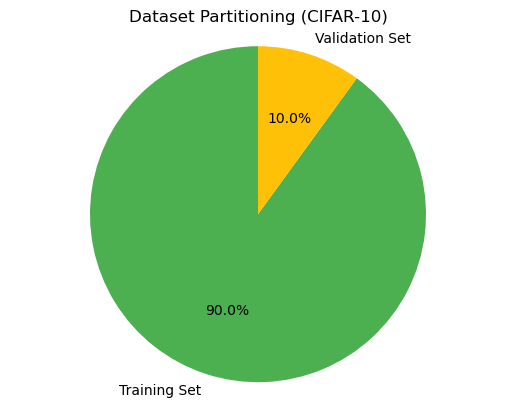

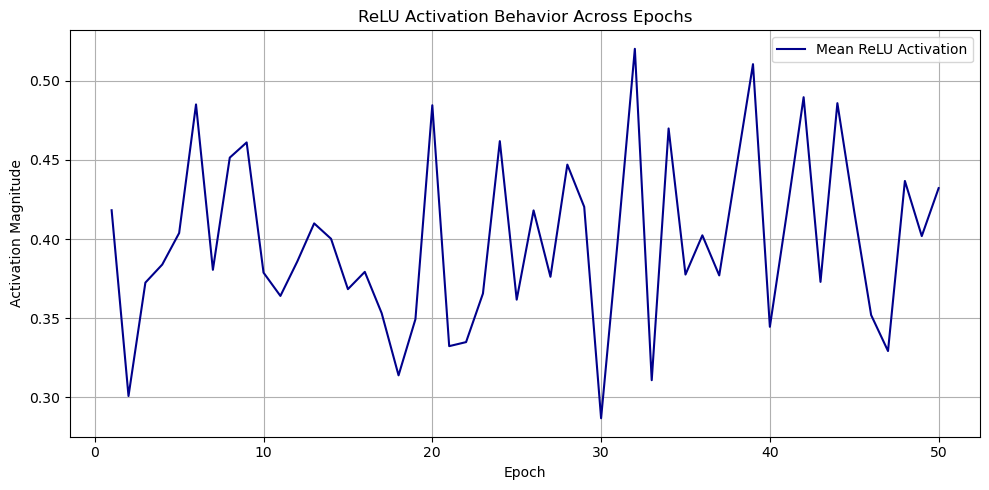

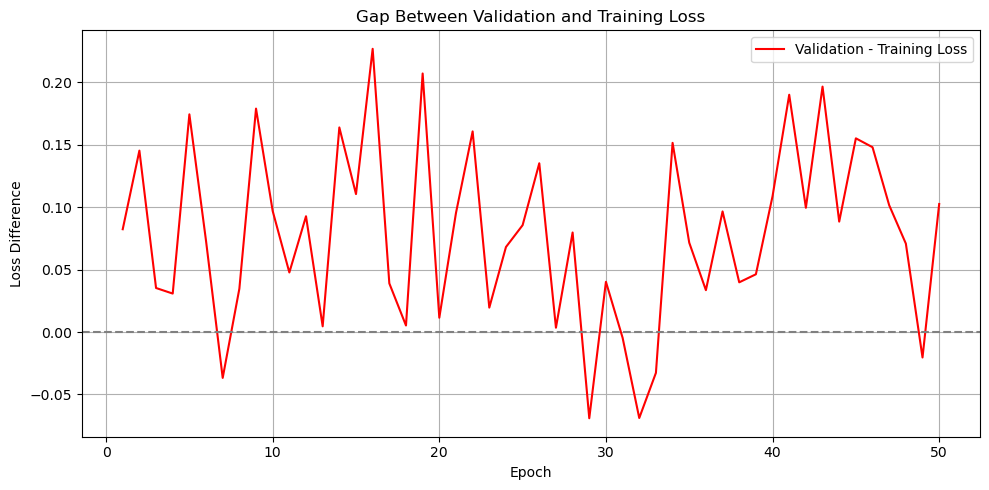

313/313 - 6s - 18ms/step - accuracy: 0.7391 - loss: 0.8504
Test accuracy: 0.7391


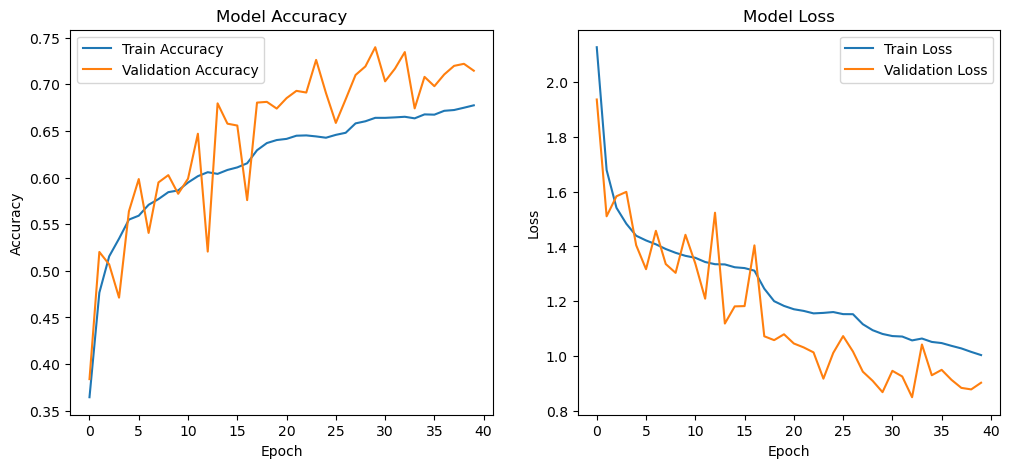

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


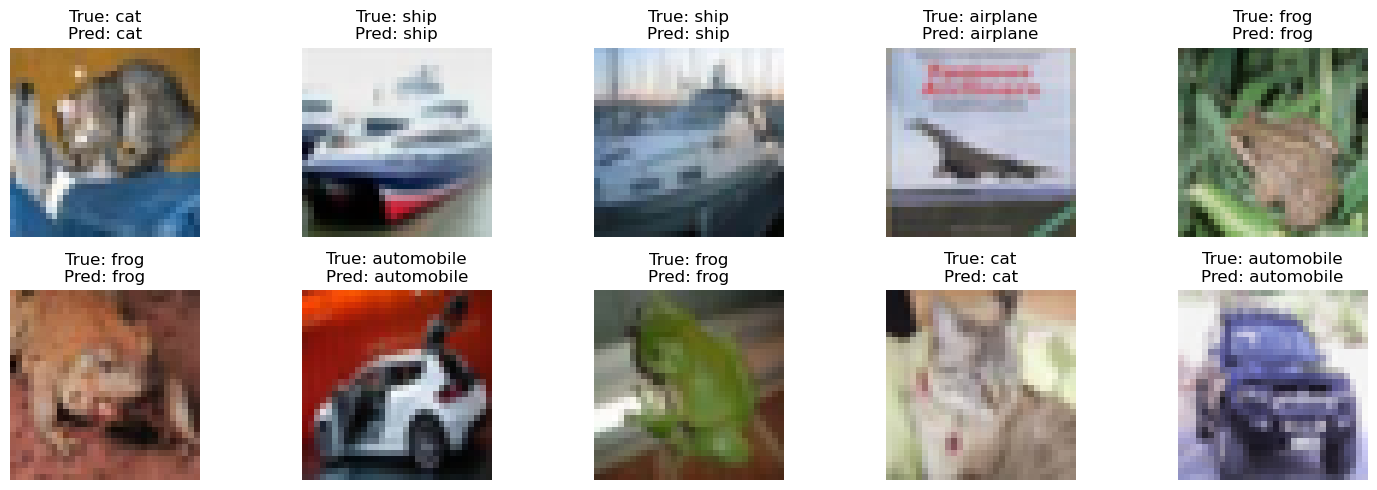

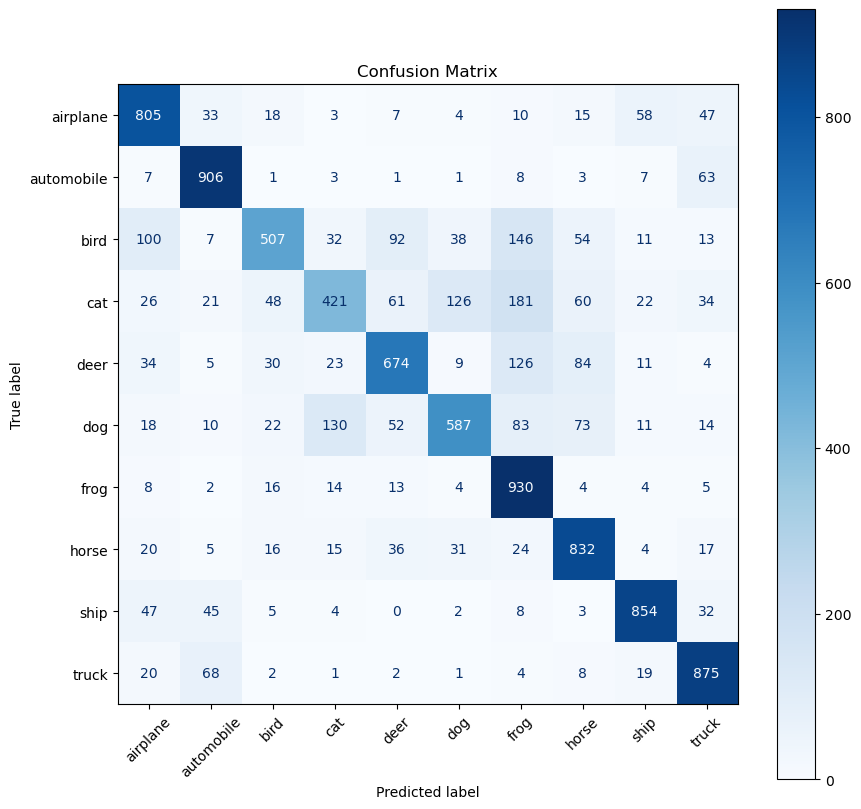

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split validation set (10%)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

# Normalize pixel values
x_train, x_val, x_test = x_train/255.0, x_val/255.0, x_test/255.0

# One-hot encode labels
y_train, y_val, y_test = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Improved CNN model structure
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks (Early Stopping, Reduce LR)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks,
                    verbose=1)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Partitioning Chart
plt.figure()
plt.pie([len(x_train), len(x_val)], labels=['Training Set', 'Validation Set'],
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Dataset Partitioning (CIFAR-10)')
plt.axis('equal')
plt.show()

# ReLU Activation Simulation
epochs = np.arange(1, 51)
dummy_activation_outputs = np.maximum(0, np.random.randn(50, 100))
mean_activations = dummy_activation_outputs.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, mean_activations, label='Mean ReLU Activation', color='darkblue')
plt.xlabel('Epoch')
plt.ylabel('Activation Magnitude')
plt.title('ReLU Activation Behavior Across Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss Gap Simulation
train_loss = np.linspace(1.5, 0.5, 50) + np.random.normal(0, 0.05, 50)
val_loss = np.linspace(1.6, 0.6, 50) + np.random.normal(0, 0.05, 50)
loss_diff = val_loss - train_loss

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_diff, label='Validation - Training Loss', color='red')
plt.axhline(0, linestyle='--', color='grey')
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Gap Between Validation and Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()







# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history (accuracy & loss)
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Predict and visualize test samples
predictions = model.predict(x_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    pred_label = labels[np.argmax(predictions[i])]
    true_label = labels[np.argmax(y_test[i])]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()
